In [49]:
import pandas as pd

# 读取Excel文件中的表格
data1 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件1.xlsx", sheet_name=0)
data2 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件2.xlsx", sheet_name=0)
data3 = pd.read_excel("/Users/zhangying/Desktop/2024美赛/2023国赛/附件3.xlsx", sheet_name=0)
data3 = data3.rename(columns={'日期': '销售日期'})
# 1. 合并 data1 和 data2，基于 '单品编码'
merged_df_1_2 = pd.merge(data2, data1, on=['单品编码'])

# 2. 合并 merged_df_1_2 和 data3，基于 '单品编码' 和 '销售日期'
# 假设 data2 和 data3 都有 '销售日期' 列，如果列名不同，需要进行重命名以匹配
merged_final = pd.merge(merged_df_1_2, data3, on=['单品编码','销售日期'], how='inner')  # 使用 inner join 确保匹配日期和编码

# 计算每个分类的销售总量
merged_final['销售总量'] = merged_final['销售单价(元/千克)'] * merged_final['销量(千克)']

# 查看合并结果
print(merged_final)




             销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型  \
0      2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售   
1      2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售   
2      2020-07-01  09:21:55.556  102900005117056   0.277         7.6   销售   
3      2020-07-01  09:22:01.274  102900005117056   0.132         7.6   销售   
4      2020-07-01  09:41:09.342  102900005117056   0.198         7.6   销售   
...           ...           ...              ...     ...         ...  ...   
878498 2023-06-21  16:30:43.092  102900011036686   1.000         3.9   销售   
878499 2023-06-23  18:47:46.777  102900011036686   1.000         3.9   销售   
878500 2023-06-27  20:48:10.998  102900011036686   1.000         3.9   销售   
878501 2023-06-29  19:14:35.799  102900011036686   1.000         2.3   销售   
878502 2023-06-30  11:57:30.376  102900011036686   1.000         3.9   销售   

       是否打折销售     单品名称        分类编码 分类名称  批发价格(元/千克)    销售总量  
0           否

In [ ]:
# # 将 merged_final 的前十行导出为 CSV 文件
# merged_final.head(10).to_csv('merged_final_top10.csv', index=False)

# print("The top 10 rows have been successfully exported to a CSV file: merged_final_top10.csv")


The top 10 rows have been successfully exported to a CSV file: merged_final_top10.csv


In [51]:
# 计算每个分类的平均批发价格
average_wholesale_price = merged_final.groupby('分类名称')['批发价格(元/千克)'].transform('mean')

# 按照分类名称和销售日期计算平均批发价格
merged_final['平均批发价格(元/千克)'] = merged_final.groupby(['分类名称', '销售日期'])['批发价格(元/千克)'].transform('mean')

# 查看结果
print(merged_final)


             销售日期        扫码销售时间             单品编码  销量(千克)  销售单价(元/千克) 销售类型  \
0      2020-07-01  09:15:07.924  102900005117056   0.396         7.6   销售   
1      2020-07-01  09:17:33.905  102900005117056   0.409         7.6   销售   
2      2020-07-01  09:21:55.556  102900005117056   0.277         7.6   销售   
3      2020-07-01  09:22:01.274  102900005117056   0.132         7.6   销售   
4      2020-07-01  09:41:09.342  102900005117056   0.198         7.6   销售   
...           ...           ...              ...     ...         ...  ...   
878498 2023-06-21  16:30:43.092  102900011036686   1.000         3.9   销售   
878499 2023-06-23  18:47:46.777  102900011036686   1.000         3.9   销售   
878500 2023-06-27  20:48:10.998  102900011036686   1.000         3.9   销售   
878501 2023-06-29  19:14:35.799  102900011036686   1.000         2.3   销售   
878502 2023-06-30  11:57:30.376  102900011036686   1.000         3.9   销售   

       是否打折销售     单品名称        分类编码 分类名称  批发价格(元/千克)    销售总量  平均批发价格(元/千克)  

In [40]:
# 对每一天的相同分类名称的销售总量进行求和，并存储对应的平均批发价格
data_new = merged_final.groupby(['分类名称', '销售日期']).agg(
    总销售量=('销售总量', 'sum'),
    平均批发价格=('平均批发价格(元/千克)', 'mean')
).reset_index()

# 查看结果
print(data_new)


       分类名称       销售日期      总销售量     平均批发价格
0     水生根茎类 2020-07-01   70.2838   8.820667
1     水生根茎类 2020-07-02   53.1208   7.458571
2     水生根茎类 2020-07-03   76.6930   5.610000
3     水生根茎类 2020-07-04  118.7532  14.190625
4     水生根茎类 2020-07-05   40.1900   5.420000
...     ...        ...       ...        ...
6469    食用菌 2023-06-26  216.6680   7.294035
6470    食用菌 2023-06-27  193.8920   7.402807
6471    食用菌 2023-06-28  247.9080   6.268194
6472    食用菌 2023-06-29  225.9360   6.511515
6473    食用菌 2023-06-30  258.8280   9.240145

[6474 rows x 4 columns]


绘制品类散点图！

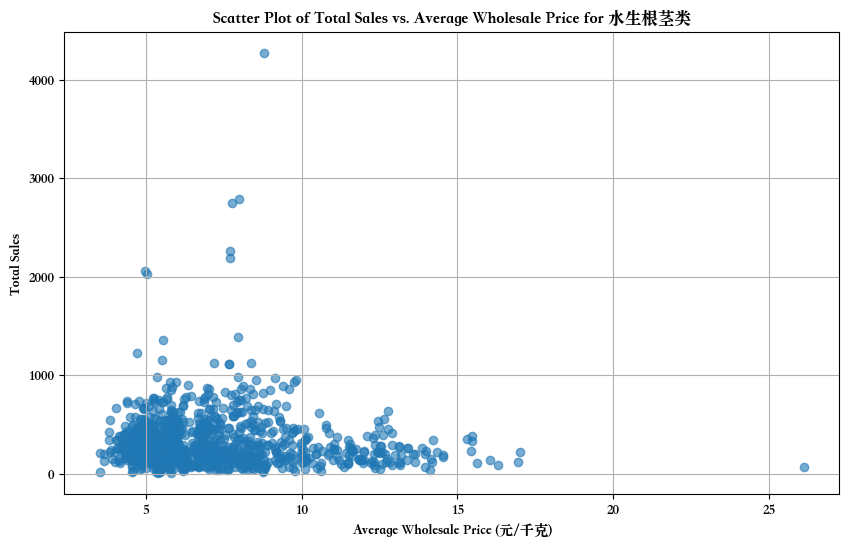

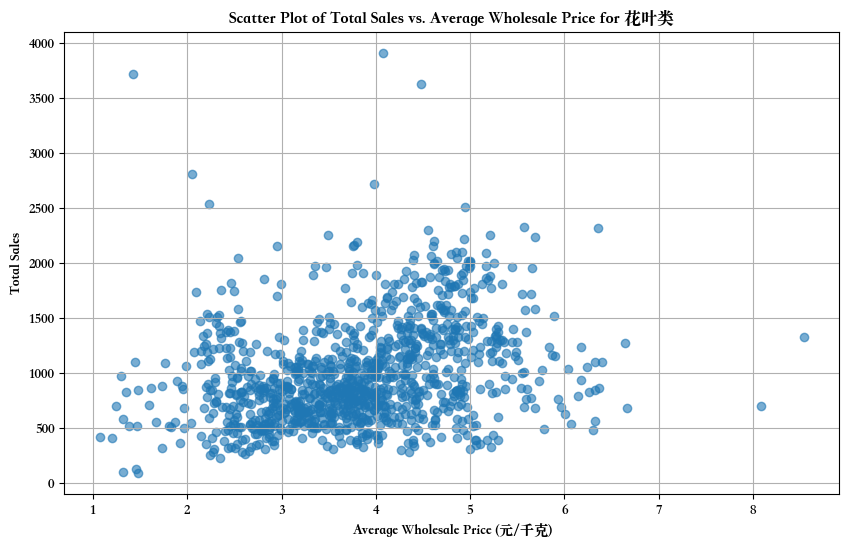

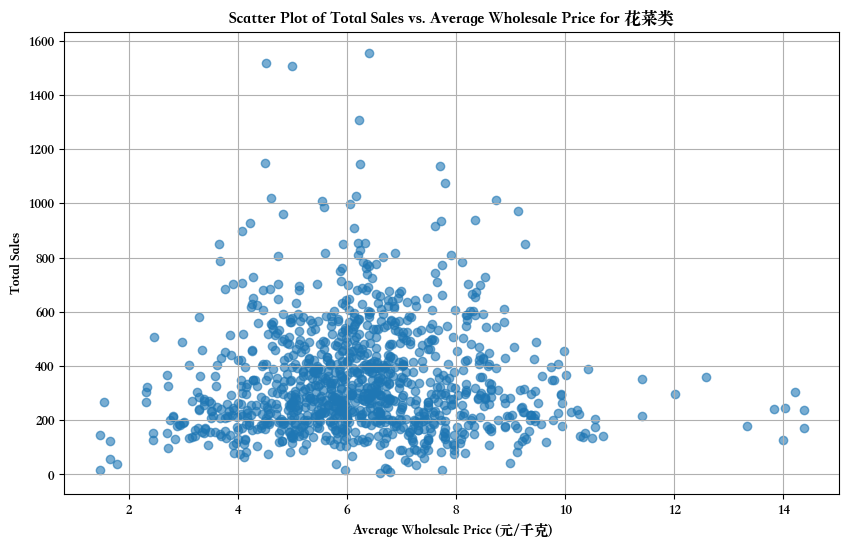

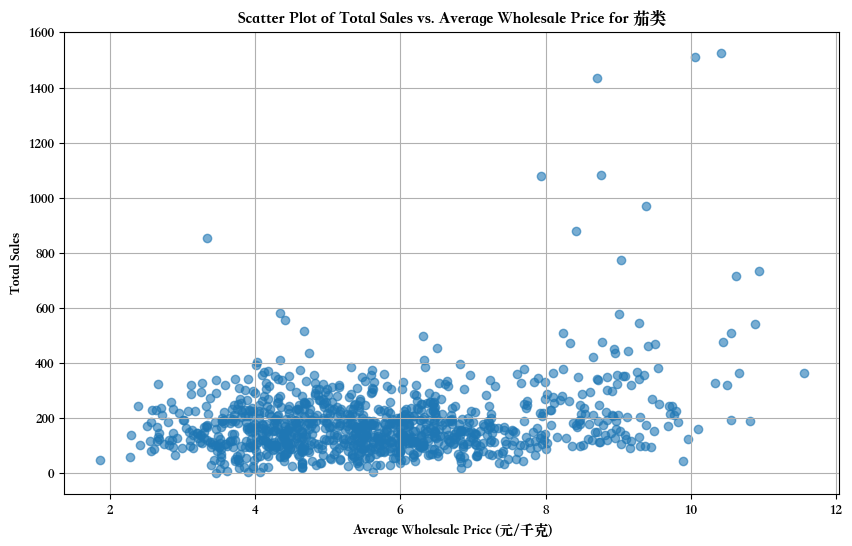

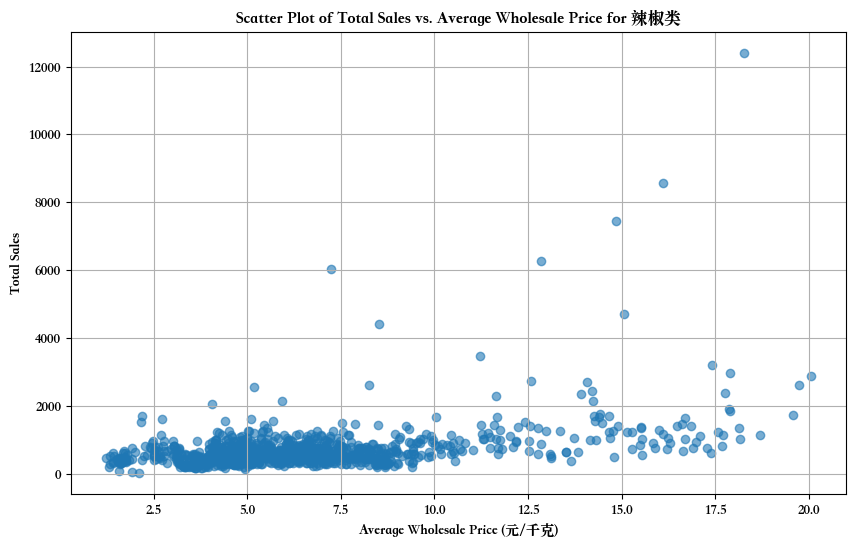

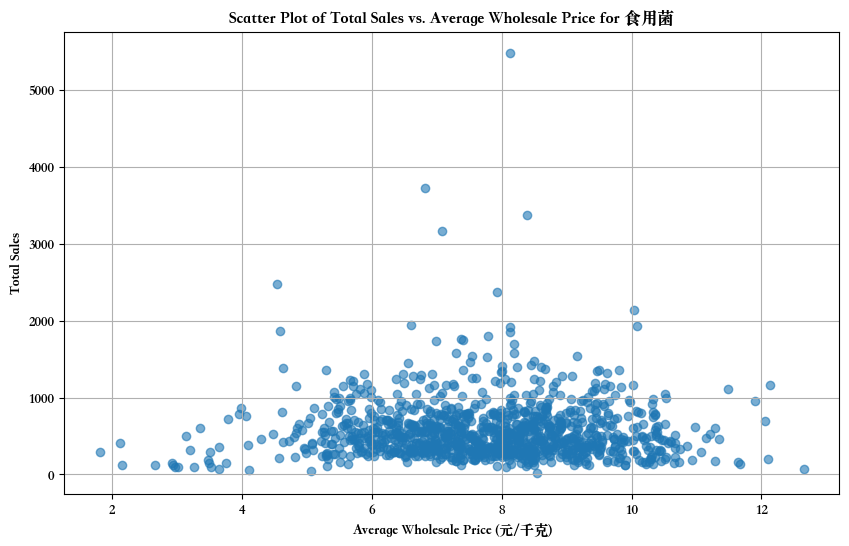

In [54]:
import matplotlib.pyplot as plt

# 绘制每个分类名称的单独散点图
categories = data_new['分类名称'].unique()

for category in categories:
    category_data = data_new[data_new['分类名称'] == category]
    plt.figure(figsize=(10, 6))
    plt.scatter(category_data['平均批发价格'], category_data['总销售量'], alpha=0.6)
    plt.title(f'Scatter Plot of Total Sales vs. Average Wholesale Price for {category}')
    plt.xlabel('Average Wholesale Price (元/千克)')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.show()


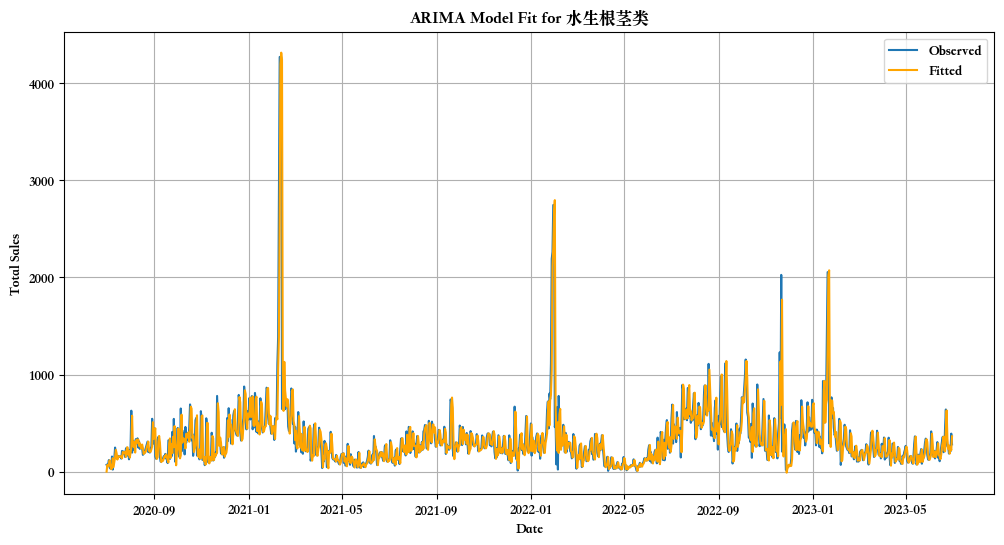

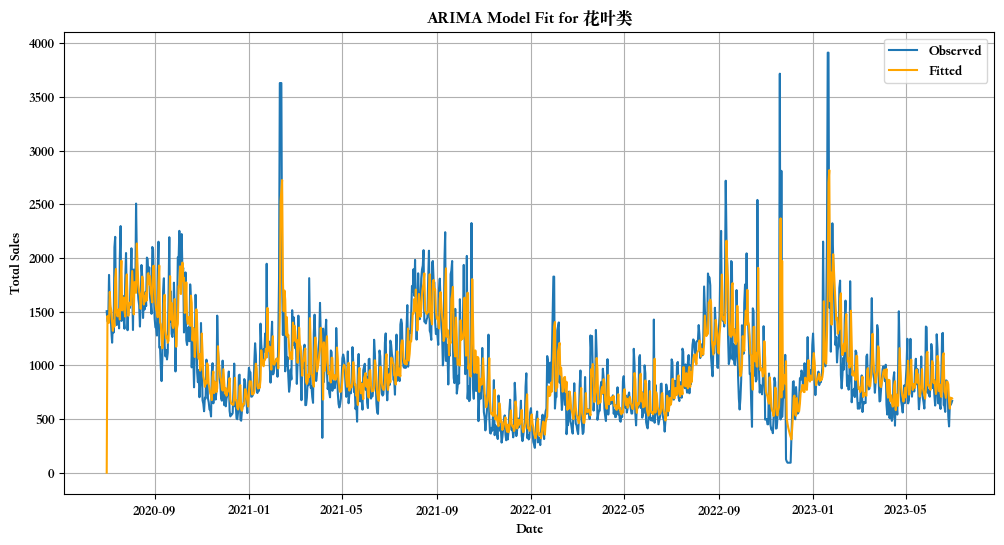

/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


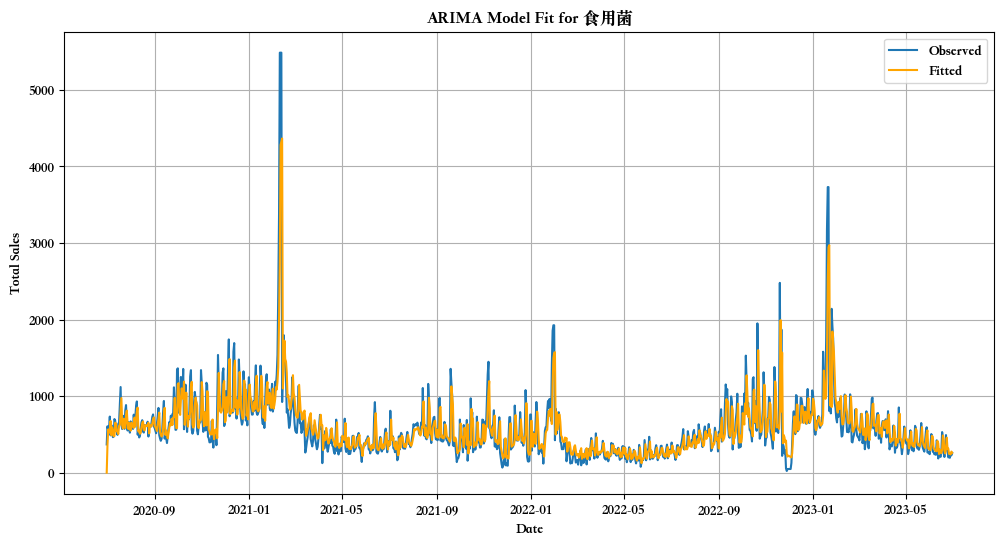

/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


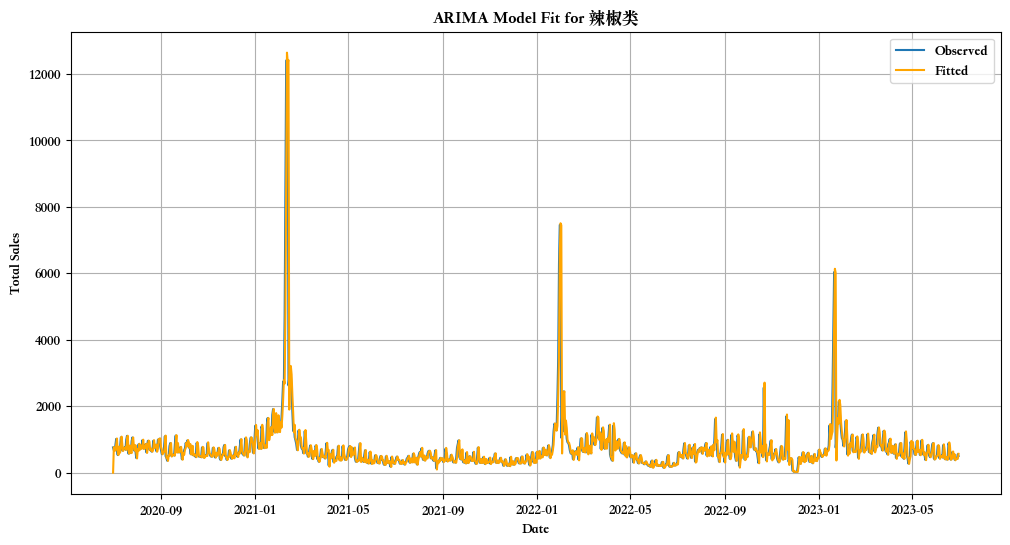

/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


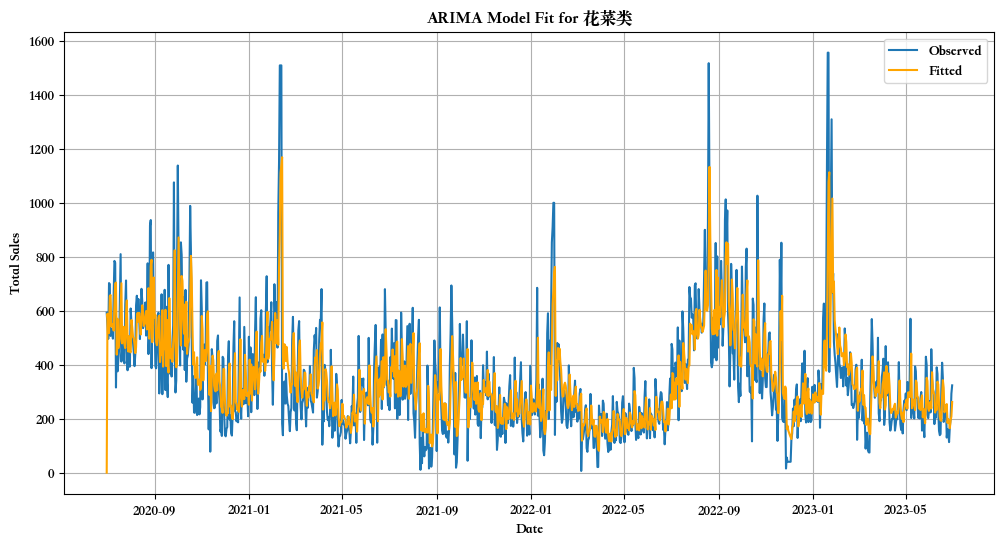

/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


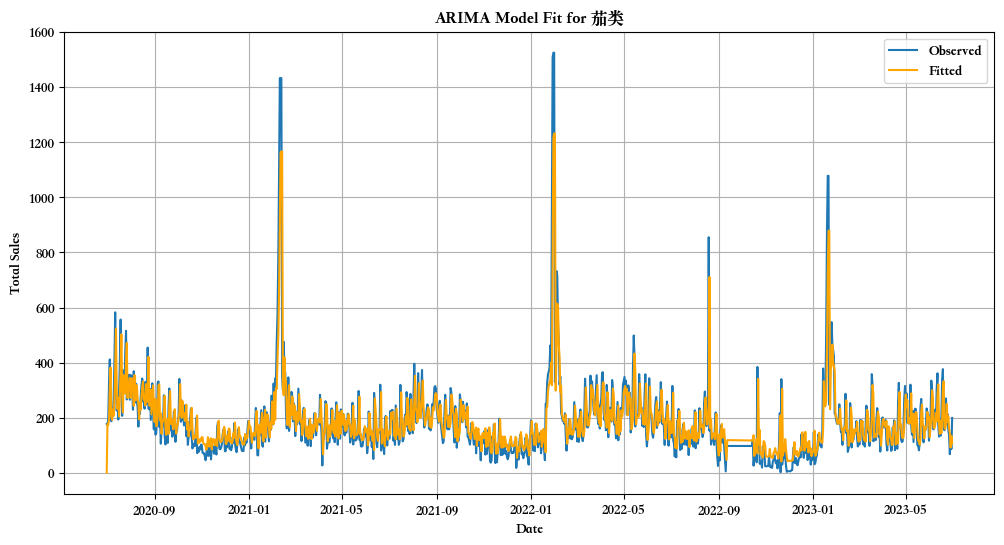

In [77]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# 遍历所有分类
for category in data_new['分类名称'].unique():
    example_category = data_new[data_new['分类名称'] == category][['总销售量']].copy()
    example_category = example_category.asfreq('D')  # 将频率设置为每日
    example_category['总销售量'] = example_category['总销售量'].fillna(method='ffill')  # 填充缺失值

    # 使用 ARIMA 模型
    model = ARIMA(example_category['总销售量'], order=(1, 1, 1))  # 简单 ARIMA 模型，order 可根据需要调整
    model_fit = model.fit()

    # 预测并绘制结果
    plt.figure(figsize=(12, 6))
    plt.plot(example_category.index, example_category['总销售量'], label='Observed')
    plt.plot(example_category.index, model_fit.fittedvalues, label='Fitted', color='orange')
    plt.title(f'ARIMA Model Fit for {category}')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.legend()
    plt.grid(True)
    plt.show()


/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/envs/pytorch2.2/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertib

Future 7-day forecast for each category:
     分类名称       销售日期      预测总销售量
0   水生根茎类 2023-07-01  311.050223
1   水生根茎类 2023-07-02  289.087186
2   水生根茎类 2023-07-03  305.126989
3   水生根茎类 2023-07-04  293.412977
4   水生根茎类 2023-07-05  301.967825
5   水生根茎类 2023-07-06  295.720143
6   水生根茎类 2023-07-07  300.282882
7     花叶类 2023-07-01  698.397212
8     花叶类 2023-07-02  712.581595
9     花叶类 2023-07-03  719.150467
10    花叶类 2023-07-04  722.192550
11    花叶类 2023-07-05  723.601357
12    花叶类 2023-07-06  724.253784
13    花叶类 2023-07-07  724.555926
14    食用菌 2023-07-01  281.258086
15    食用菌 2023-07-02  296.710308
16    食用菌 2023-07-03  307.355439
17    食用菌 2023-07-04  314.688934
18    食用菌 2023-07-05  319.741024
19    食用菌 2023-07-06  323.221439
20    食用菌 2023-07-07  325.619118
21    辣椒类 2023-07-01  495.548565
22    辣椒类 2023-07-02  496.262199
23    辣椒类 2023-07-03  496.178308
24    辣椒类 2023-07-04  496.188169
25    辣椒类 2023-07-05  496.187010
26    辣椒类 2023-07-06  496.187146
27    辣椒类 2023-07-07  496.187130
28

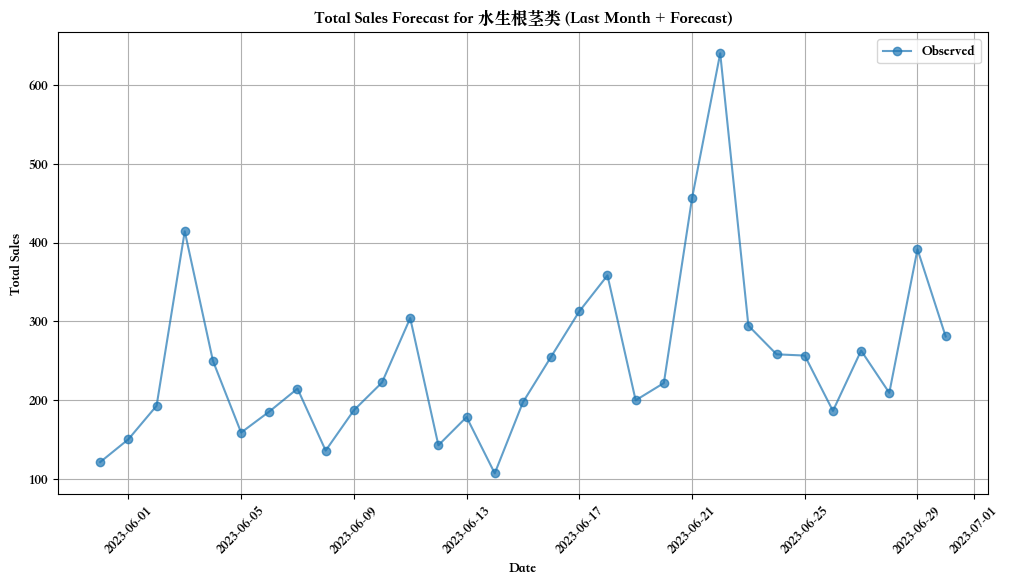

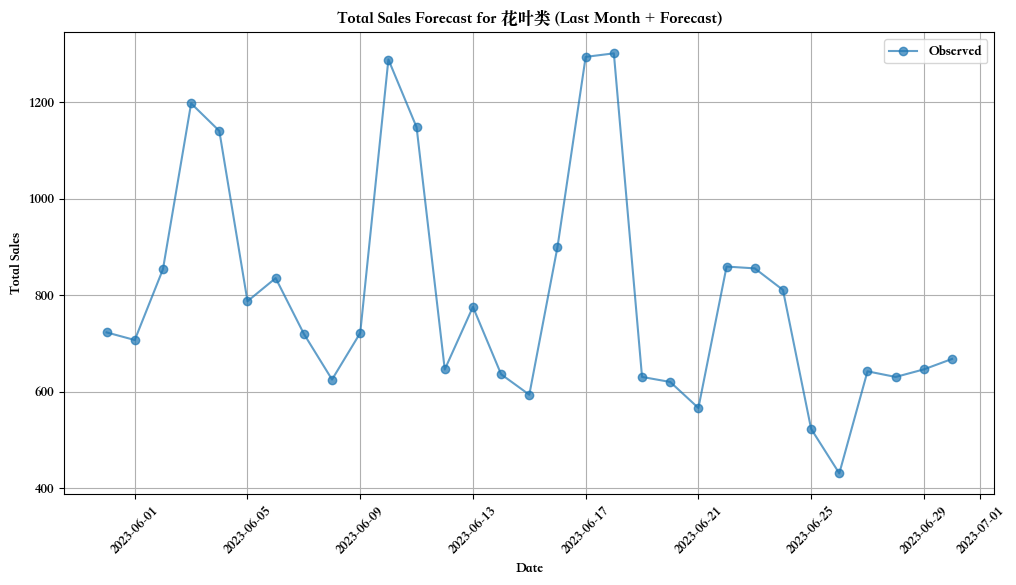

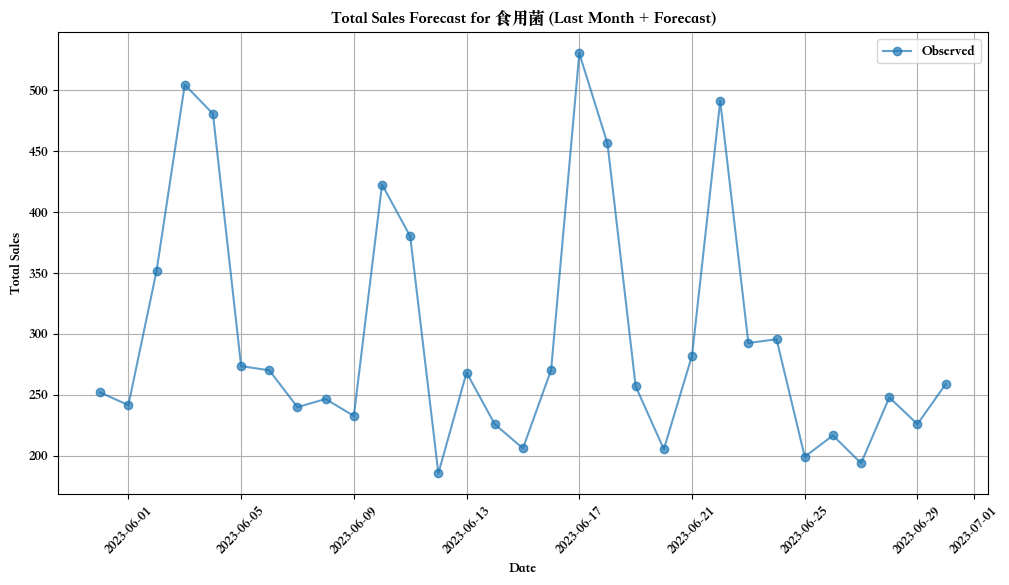

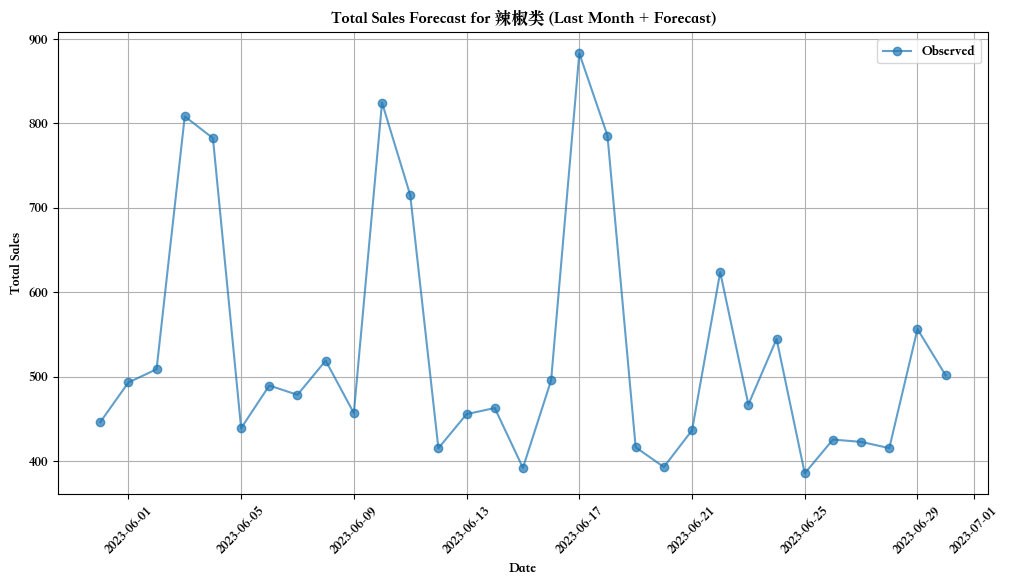

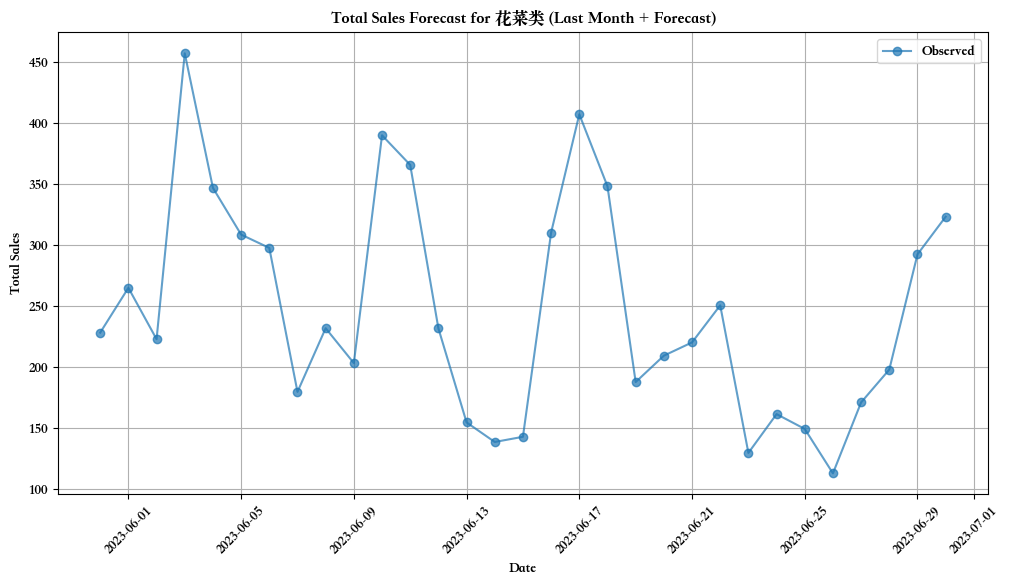

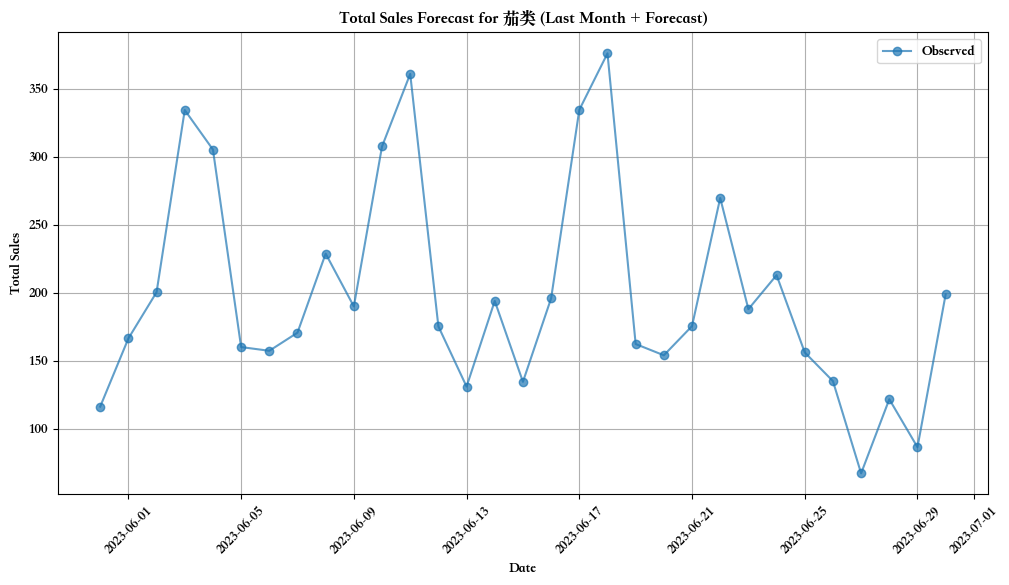

In [81]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

# 存储预测结果
forecast_results = pd.DataFrame()

# 遍历所有分类
for category in data_new['分类名称'].unique():
    example_category = data_new[data_new['分类名称'] == category][['总销售量']].copy()
    example_category = example_category.asfreq('D')  # 将频率设置为每日
    example_category['总销售量'] = example_category['总销售量'].fillna(method='ffill')  # 填充缺失值

    # 使用 ARIMA 模型
    model = ARIMA(example_category['总销售量'], order=(1, 1, 1))  # 简单 ARIMA 模型，order 可根据需要调整
    model_fit = model.fit()

    # 预测未来七天
    future_dates = pd.date_range(start=example_category.index[-1] + pd.Timedelta(days=1), periods=7)
    forecast_values = model_fit.forecast(steps=7)

    # 创建预测结果 DataFrame
    forecast_df = pd.DataFrame({
        '分类名称': category,
        '销售日期': future_dates,
        '预测总销售量': forecast_values
    })
    forecast_results = pd.concat([forecast_results, forecast_df], ignore_index=True)

# 输出每个分类未来七天的预测结果
print("Future 7-day forecast for each category:")
print(forecast_results)

# 生成 combined_data，合并历史数据和预测数据
combined_data = pd.concat([
    data_new.reset_index()[['分类名称', '销售日期', '总销售量']],
    forecast_results
], ignore_index=True)

# 确保 '销售日期' 是时间格式
combined_data['销售日期'] = pd.to_datetime(combined_data['销售日期'])

# 筛选最近一个月的历史数据和未来 7 天的预测数据
latest_date = combined_data['销售日期'].max()
start_date = latest_date - pd.DateOffset(days=37)  # 包括最近一个月 + 7 天预测
filtered_combined_data = combined_data[(combined_data['销售日期'] >= start_date) & 
                                       (combined_data['销售日期'] <= latest_date + pd.Timedelta(days=7))]

# 按分类绘制图像
categories = combined_data['分类名称'].unique()
for category in categories:
    category_data = filtered_combined_data[filtered_combined_data['分类名称'] == category]
    plt.figure(figsize=(12, 6))
    plt.plot(category_data['销售日期'], category_data['总销售量'], marker='o', label='Observed', linestyle='-', alpha=0.7)
    predicted_data = category_data[category_data['销售日期'] > latest_date]
    
    # 检查是否有预测数据
    if not predicted_data.empty:
        plt.plot(predicted_data['销售日期'], predicted_data['预测总销售量'], marker='x', label='Forecast', linestyle='--', color='orange')
        
    plt.title(f'Total Sales Forecast for {category} (Last Month + Forecast)')
    plt.xlabel('Date')
    plt.ylabel('Total Sales')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()


In [62]:
# 筛选 2023 年 6 月 1 日至 6 月 30 日的水生根茎类数据
filtered_data = merged_final[(merged_final['销售日期'] >= '2023-06-01') & 
                             (merged_final['销售日期'] <= '2023-06-30') & 
                             (merged_final['分类名称'] == '水生根茎类')]

# 按天查看销售总量
daily_sales = filtered_data[['销售日期', '销售总量']]

# 查看结果
print(daily_sales)


             销售日期    销售总量
116491 2023-06-01  3.2060
116492 2023-06-01  3.9060
116493 2023-06-01  4.0180
116494 2023-06-02  3.9060
116495 2023-06-02  5.6140
...           ...     ...
820405 2023-06-29  2.1510
820406 2023-06-29  5.0040
820407 2023-06-29  2.2050
820408 2023-06-30  5.1120
820409 2023-06-30  2.4624

[1208 rows x 2 columns]


In [52]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 准备数据：自变量为平均批发价格，因变量为总销售量
X = data_new[['平均批发价格']]  # 自变量，平均批发价格
y = data_new['总销售量']  # 因变量，总销售量

# 创建线性回归模型
model = LinearRegression()

# 训练模型
model.fit(X, y)

# 使用模型进行预测
data_new['预测总销售量'] = model.predict(X)

# 查看结果
print(data_new[['分类名称', '销售日期', '平均批发价格', '总销售量', '预测总销售量']])


       分类名称       销售日期     平均批发价格      总销售量      预测总销售量
0     水生根茎类 2020-07-01   8.820667   70.2838  528.144311
1     水生根茎类 2020-07-02   7.458571   53.1208  524.203561
2     水生根茎类 2020-07-03   5.610000   76.6930  518.855361
3     水生根茎类 2020-07-04  14.190625  118.7532  543.680421
4     水生根茎类 2020-07-05   5.420000   40.1900  518.305662
...     ...        ...        ...       ...         ...
6469    食用菌 2023-06-26   7.294035  216.6680  523.727532
6470    食用菌 2023-06-27   7.402807  193.8920  524.042226
6471    食用菌 2023-06-28   6.268194  247.9080  520.759618
6472    食用菌 2023-06-29   6.511515  225.9360  521.463582
6473    食用菌 2023-06-30   9.240145  258.8280  529.357925

[6474 rows x 5 columns]


In [43]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 准备数据：自变量为平均批发价格，因变量为总销售量
X = data_new[['平均批发价格']]  # 自变量
y = data_new['总销售量']  # 因变量

# 创建随机森林回归模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
model.fit(X, y)

# 使用模型进行预测
data_new['预测总销售量'] = model.predict(X)

# 查看结果
print(data_new[['分类名称', '销售日期', '平均批发价格', '总销售量', '预测总销售量']])


       分类名称       销售日期     平均批发价格      总销售量      预测总销售量
0     水生根茎类 2020-07-01   8.820667   70.2838  142.010614
1     水生根茎类 2020-07-02   7.458571   53.1208  289.739286
2     水生根茎类 2020-07-03   5.610000   76.6930  170.026344
3     水生根茎类 2020-07-04  14.190625  118.7532  744.667796
4     水生根茎类 2020-07-05   5.420000   40.1900  215.813238
...     ...        ...        ...       ...         ...
6469    食用菌 2023-06-26   7.294035  216.6680  326.084434
6470    食用菌 2023-06-27   7.402807  193.8920  413.468676
6471    食用菌 2023-06-28   6.268194  247.9080  331.788651
6472    食用菌 2023-06-29   6.511515  225.9360  264.034433
6473    食用菌 2023-06-30   9.240145  258.8280  266.440346

[6474 rows x 5 columns]


查看是否有缺失值

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# 创建一个新列用于存储预测销售单价
merged_final['预测销售单价(元/千克)'] = np.nan

# 遍历每个唯一的单品名称进行回归分析
for product in merged_final['单品名称'].unique():
    # 筛选出特定单品的数据
    product_data = merged_final[merged_final['单品名称'] == product]
    
    # 检查是否有足够的数据进行回归
    if len(product_data) > 1:
        # 去除缺失值
        relevant_data = product_data[['批发价格(元/千克)', '销售单价(元/千克)', '销量(千克)']].dropna()
        
        # 仅在有足够数据的情况下进行回归
        if len(relevant_data) > 1:
            X = relevant_data[['批发价格(元/千克)', '销量(千克)']]  # 自变量
            y = relevant_data['销售单价(元/千克)']  # 因变量
            
            # 训练线性回归模型
            model = LinearRegression()
            model.fit(X, y)
            
            # 预测当前单品的销售单价
            predicted_prices = model.predict(product_data[['批发价格(元/千克)', '销量(千克)']].fillna(0))
            
            # 将预测值填充回原数据框中
            merged_final.loc[merged_final['单品名称'] == product, '预测销售单价(元/千克)'] = predicted_prices

# 显示结果
print(merged_final[['单品名称', '批发价格(元/千克)', '销量(千克)', '销售单价(元/千克)', '预测销售单价(元/千克)']])


              单品名称  批发价格(元/千克)  销量(千克)  销售单价(元/千克)  预测销售单价(元/千克)
0             牛首生菜        3.00   0.743         5.0      5.127526
1             牛首生菜        3.00   0.502         5.0      5.187951
2             牛首生菜        3.00   0.301         5.0      5.238347
3             牛首生菜        3.00   0.382         5.0      5.218038
4             牛首生菜        3.00   0.261         5.0      5.248376
...            ...         ...     ...         ...           ...
878498  和丰阳光海鲜菇(包)        2.02   1.000         1.5      2.073306
878499  和丰阳光海鲜菇(包)        2.02   1.000         2.5      2.073306
878500  和丰阳光海鲜菇(包)        2.02   1.000         1.5      2.073306
878501  和丰阳光海鲜菇(包)        2.03   1.000         2.5      2.068071
878502  和丰阳光海鲜菇(包)        2.03   1.000         2.5      2.068071

[878503 rows x 5 columns]


In [19]:
print(data3)

              日期             单品编码  批发价格(元/千克)
0     2020-07-01  102900005115762        3.88
1     2020-07-01  102900005115779        6.72
2     2020-07-01  102900005115786        3.19
3     2020-07-01  102900005115793        9.24
4     2020-07-01  102900005115823        7.03
...          ...              ...         ...
55977 2023-06-30  102900051000944       18.00
55978 2023-06-30  102900051004294        6.45
55979 2023-06-30  102900051010455        4.48
55980 2023-06-30  106949711300259        1.45
55981 2023-06-30  106971533450003        1.95

[55982 rows x 3 columns]


In [2]:
merged_df['销售日期'] = pd.to_datetime(merged_df['销售日期'])

# Filter data between 2020-07-01 and 2020-08-01
filtered_df = merged_df[(merged_df['销售日期'] >= '2020-07-01') & (merged_df['销售日期'] <= '2020-08-01')]

# Group by '销售日期' and '单品名称' and count the occurrences of each combination
sales_by_date_category = filtered_df.groupby(['销售日期', '单品名称']).size().reset_index(name='数量')

# Display the result
print(sales_by_date_category)

           销售日期    单品名称   数量
0    2020-07-01  七彩椒(1)    5
1    2020-07-01     上海青   28
2    2020-07-01   云南油麦菜   71
3    2020-07-01    云南生菜  114
4    2020-07-01    外地茼蒿    9
...         ...     ...  ...
1165 2020-08-01    青梗散花   52
1166 2020-08-01     青线椒   27
1167 2020-08-01  青茄子(1)   25
1168 2020-08-01   高瓜(1)    5
1169 2020-08-01  黄白菜(2)   33

[1170 rows x 3 columns]


/var/folders/bt/qcg_frss46xfvvsc6gdw2gd80000gn/T/ipykernel_36791/4169061191.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


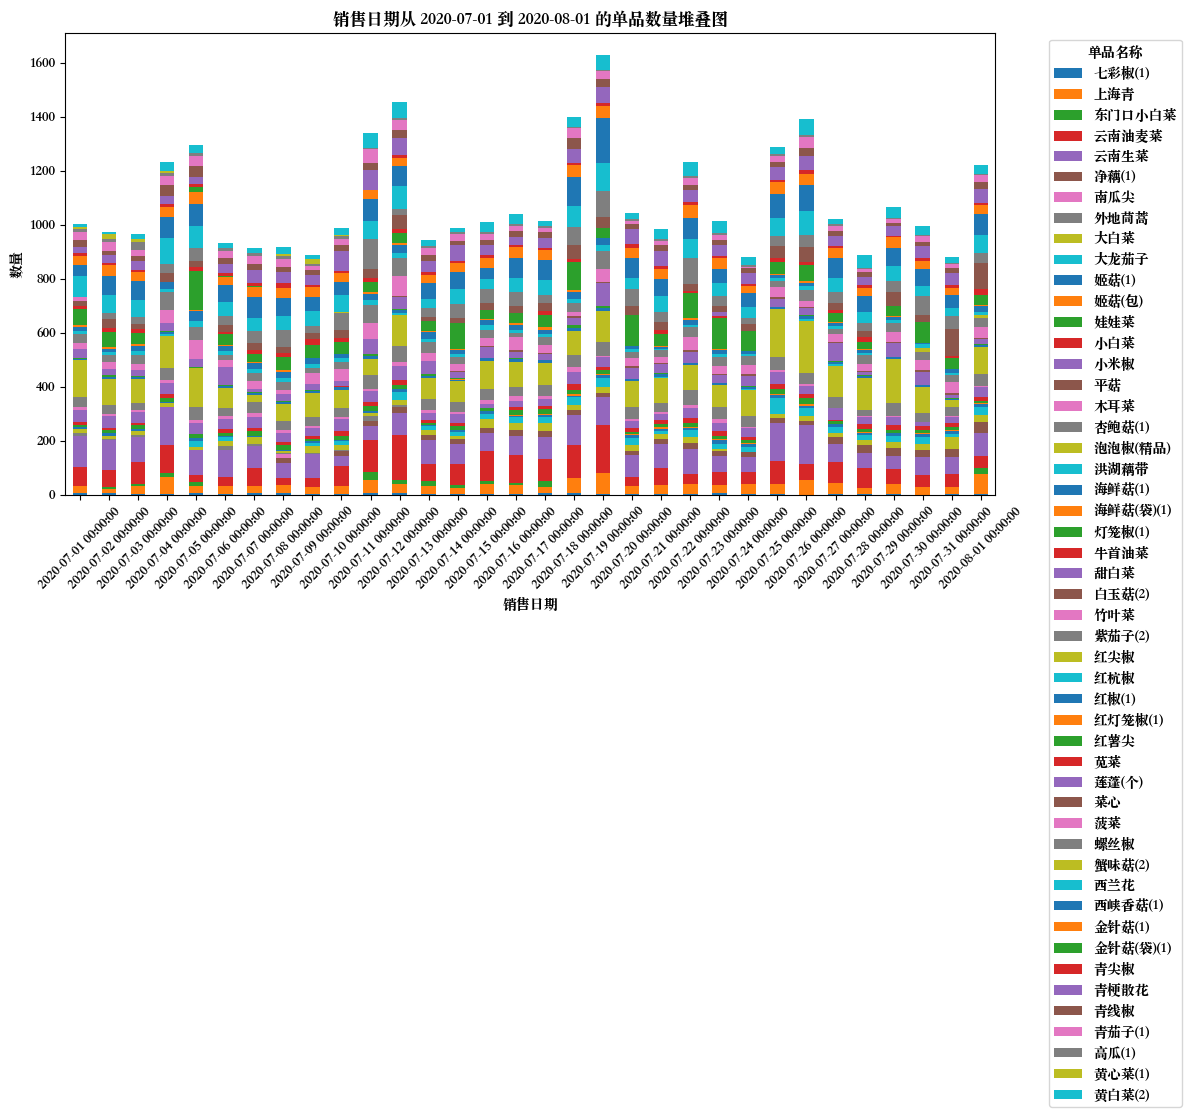

/var/folders/bt/qcg_frss46xfvvsc6gdw2gd80000gn/T/ipykernel_36791/4169061191.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


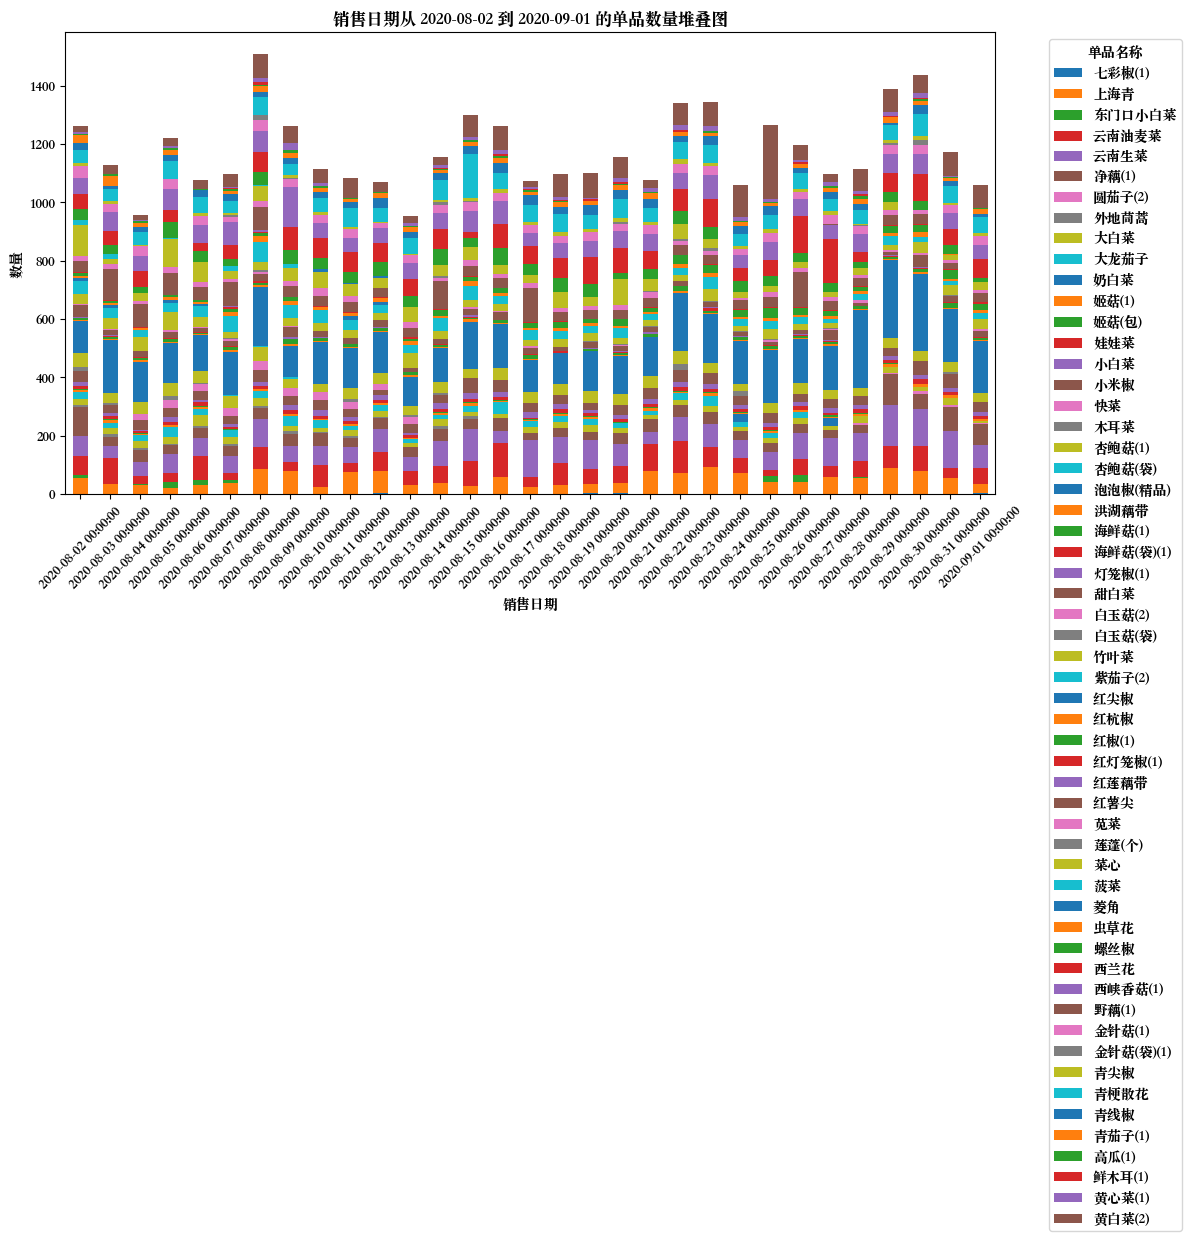

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib

# 设置字体为黑体 (SimHei) 或其他你系统中支持的中文字体
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 替换为你的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 继续绘图操作...


# Function to generate stacked bar chart for a given date range
def plot_stacked_bar_for_date_range(df, start_date, end_date):
    # Filter data within the specified date range
    filtered_df = df[(df['销售日期'] >= start_date) & (df['销售日期'] <= end_date)]
    
    # Group by '销售日期' and '单品名称' and count the occurrences
    sales_by_date_category = filtered_df.groupby(['销售日期', '单品名称']).size().reset_index(name='数量')
    
    # Pivot the data for the stacked bar plot
    pivot_df = sales_by_date_category.pivot(index='销售日期', columns='单品名称', values='数量').fillna(0)
    
    # Plotting the stacked bar chart
    pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'销售日期从 {start_date} 到 {end_date} 的单品数量堆叠图')
    plt.xlabel('销售日期')
    plt.ylabel('数量')
    plt.xticks(rotation=45)
    plt.legend(title='单品名称', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example: Generate stacked bar chart for 2020-07-01 to 2020-08-01
plot_stacked_bar_for_date_range(merged_df, '2020-07-01', '2020-08-01')

# You can call the function with different date ranges as needed:
# Example: Generate chart for another date range
plot_stacked_bar_for_date_range(merged_df, '2020-08-02', '2020-09-01')


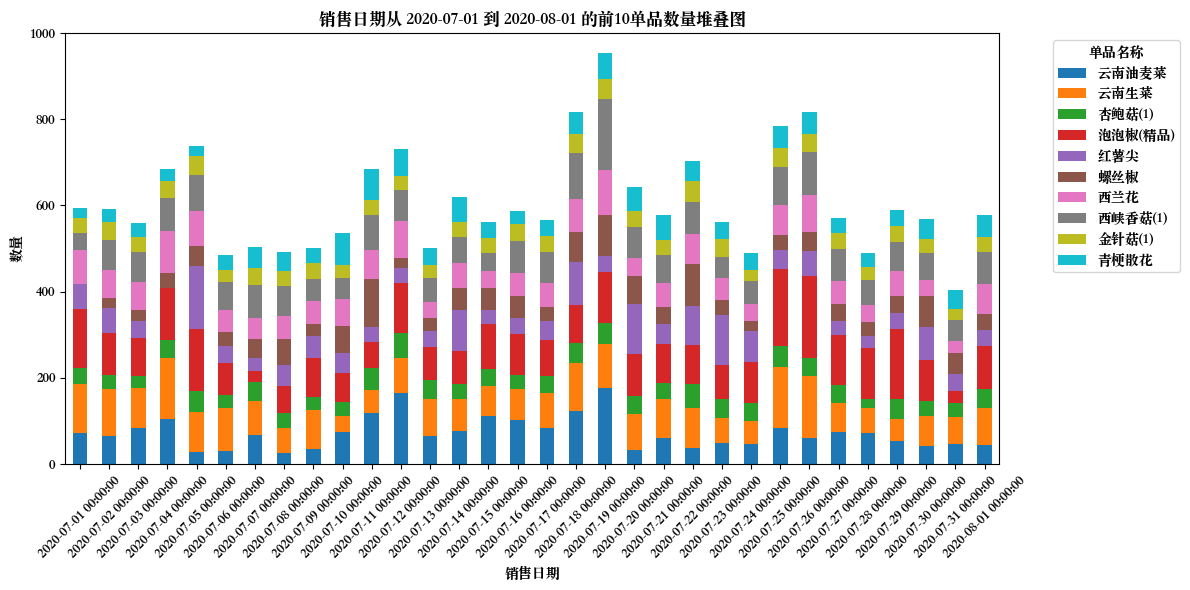

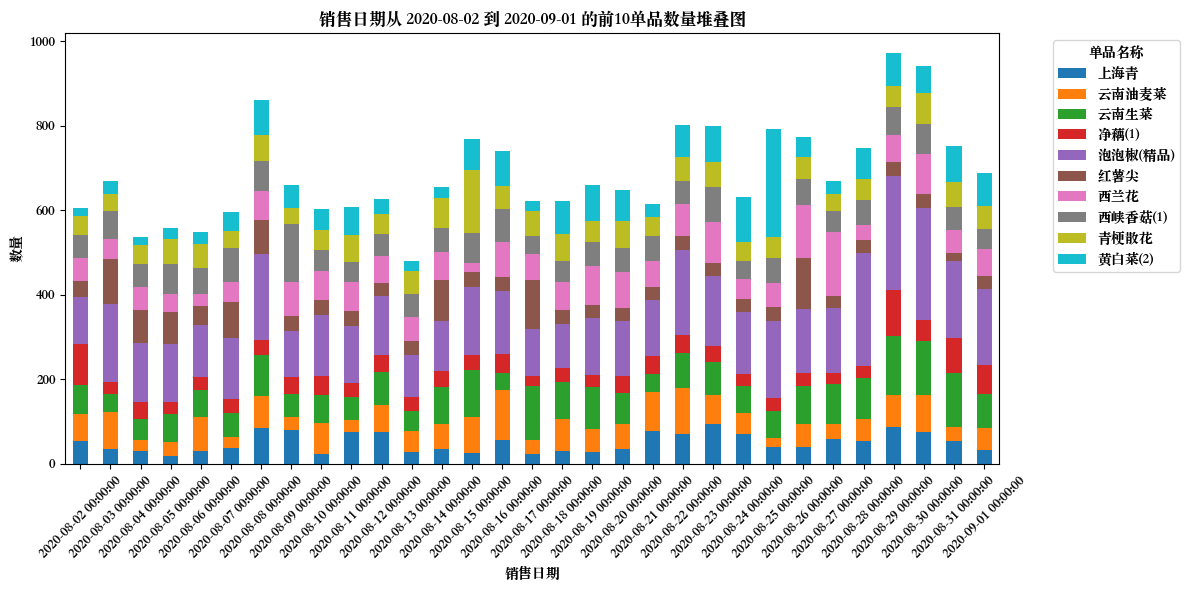

In [7]:
import matplotlib.pyplot as plt
import matplotlib

# 设置字体为黑体 (SimHei) 或其他你系统中支持的中文字体
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 替换为你的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# Function to generate stacked bar chart for a given date range and top N products
def plot_stacked_bar_for_top_n_products(df, start_date, end_date, top_n=10):
    # Filter data within the specified date range
    filtered_df = df[(df['销售日期'] >= start_date) & (df['销售日期'] <= end_date)]
    
    # Group by '单品名称' to find total sales and select top N products
    top_products = filtered_df.groupby('单品名称').size().nlargest(top_n).index
    
    # Filter the DataFrame to include only top N products
    filtered_top_df = filtered_df[filtered_df['单品名称'].isin(top_products)]
    
    # Group by '销售日期' and '单品名称' and count the occurrences
    sales_by_date_category = filtered_top_df.groupby(['销售日期', '单品名称']).size().reset_index(name='数量')
    
    # Pivot the data for the stacked bar plot
    pivot_df = sales_by_date_category.pivot(index='销售日期', columns='单品名称', values='数量').fillna(0)
    
    # Plotting the stacked bar chart
    pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'销售日期从 {start_date} 到 {end_date} 的前{top_n}单品数量堆叠图')
    plt.xlabel('销售日期')
    plt.ylabel('数量')
    plt.xticks(rotation=45)
    plt.legend(title='单品名称', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example: Generate stacked bar chart for 2020-07-01 to 2020-08-01 with top 10 products
plot_stacked_bar_for_top_n_products(merged_df, '2020-07-01', '2020-08-01', top_n=10)

# You can call the function with different date ranges as needed:
# Example: Generate chart for another date range with top 10 products
plot_stacked_bar_for_top_n_products(merged_df, '2020-08-02', '2020-09-01', top_n=10)


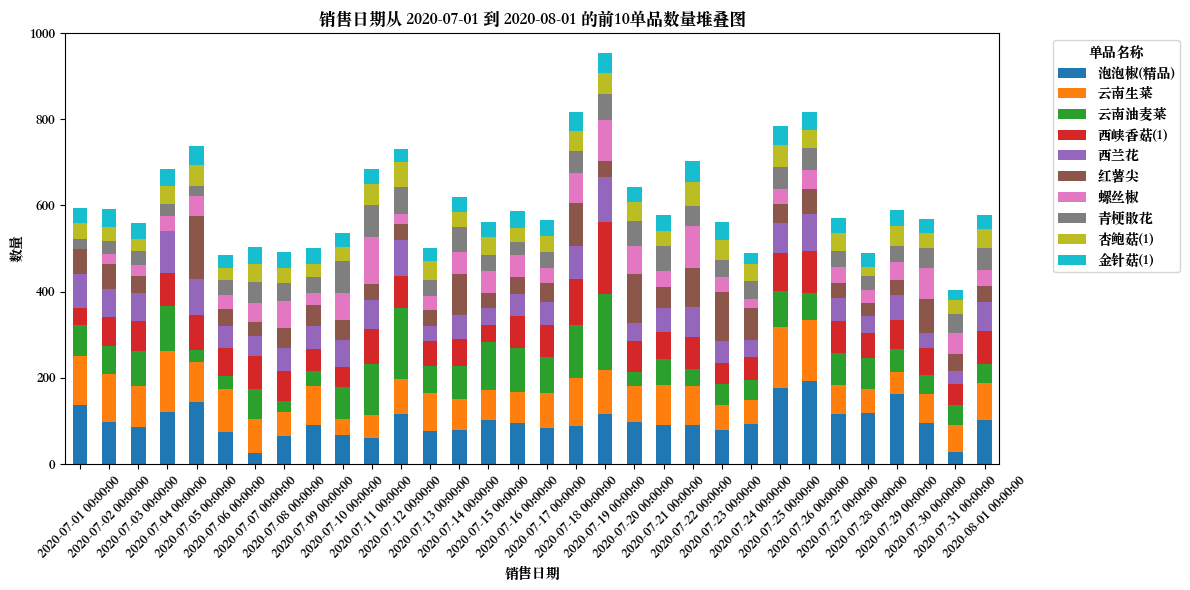

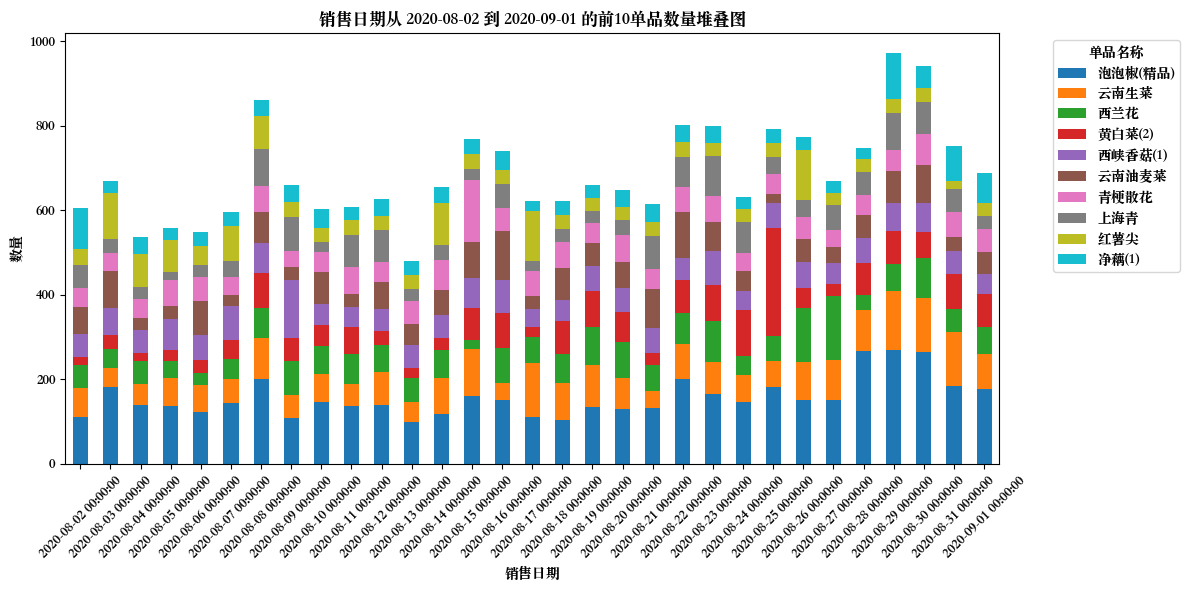

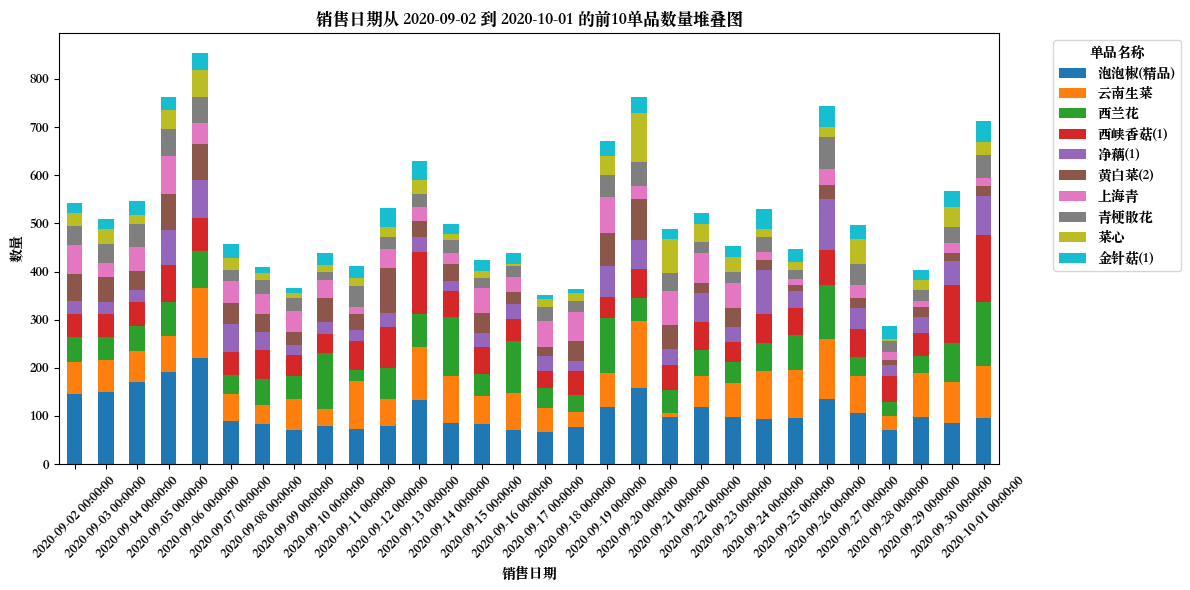

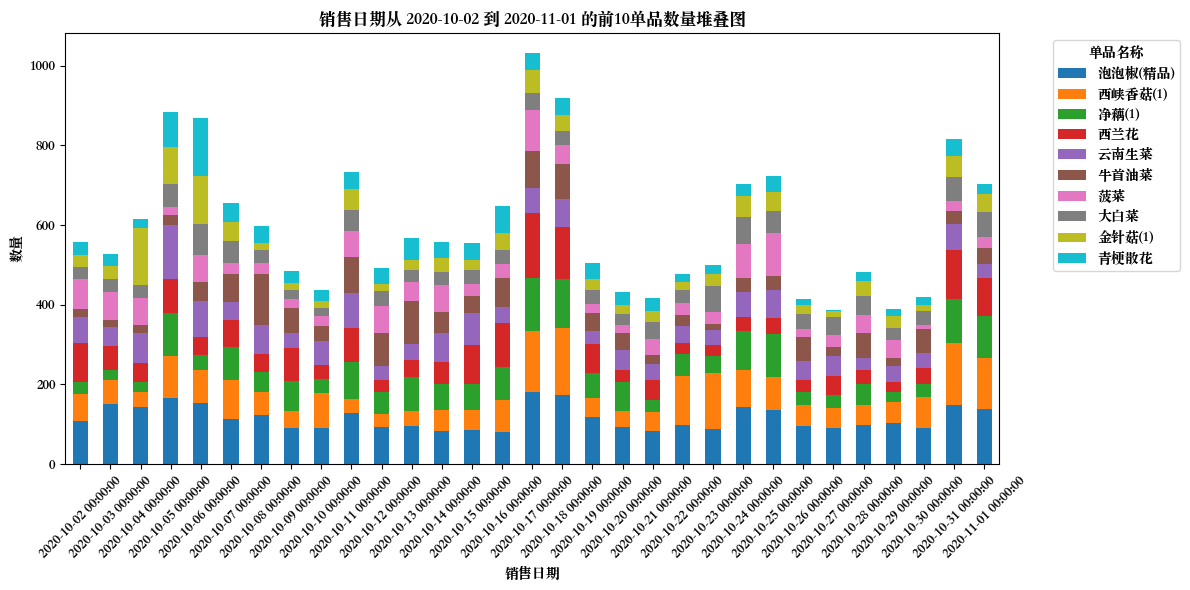

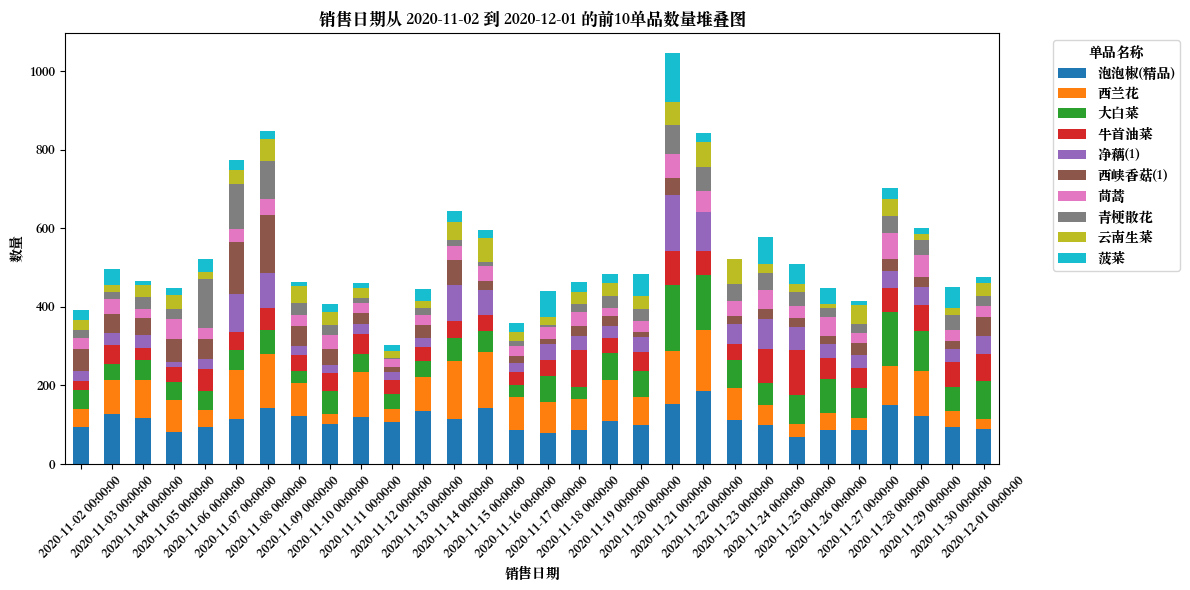

In [9]:
import matplotlib.pyplot as plt
import matplotlib

# 设置字体为黑体 (SimHei) 或其他你系统中支持的中文字体
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 替换为你的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# Function to generate stacked bar chart for a given date range and top N products
def plot_stacked_bar_for_top_n_products(df, start_date, end_date, top_n=10):
    # Filter data within the specified date range
    filtered_df = df[(df['销售日期'] >= start_date) & (df['销售日期'] <= end_date)]
    
    # Group by '单品名称' to find total sales and select top N products
    product_totals = filtered_df.groupby('单品名称').size().reset_index(name='总数量')
    top_products = product_totals.nlargest(top_n, '总数量')['单品名称']
    
    # Filter the DataFrame to include only top N products
    filtered_top_df = filtered_df[filtered_df['单品名称'].isin(top_products)]
    
    # Group by '销售日期' and '单品名称' and count the occurrences
    sales_by_date_category = filtered_top_df.groupby(['销售日期', '单品名称']).size().reset_index(name='数量')
    
    # Pivot the data for the stacked bar plot
    pivot_df = sales_by_date_category.pivot(index='销售日期', columns='单品名称', values='数量').fillna(0)
    
    # Reorder columns to sort by total quantities in descending order
    ordered_columns = top_products.tolist()  # Ensure columns follow the order of top products
    pivot_df = pivot_df[ordered_columns]
    
    # Plotting the stacked bar chart
    pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'销售日期从 {start_date} 到 {end_date} 的前{top_n}单品数量堆叠图')
    plt.xlabel('销售日期')
    plt.ylabel('数量')
    plt.xticks(rotation=45)
    plt.legend(title='单品名称', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example: Generate stacked bar chart for 2020-07-01 to 2020-08-01 with top 10 products
plot_stacked_bar_for_top_n_products(merged_df, '2020-07-01', '2020-08-01', top_n=10)

# You can call the function with different date ranges as needed:
# Example: Generate chart for another date range with top 10 products
plot_stacked_bar_for_top_n_products(merged_df, '2020-08-02', '2020-09-01', top_n=10)
plot_stacked_bar_for_top_n_products(merged_df, '2020-09-02', '2020-10-01', top_n=10)
plot_stacked_bar_for_top_n_products(merged_df, '2020-10-02', '2020-11-01', top_n=10)
plot_stacked_bar_for_top_n_products(merged_df, '2020-11-02', '2020-12-01', top_n=10)



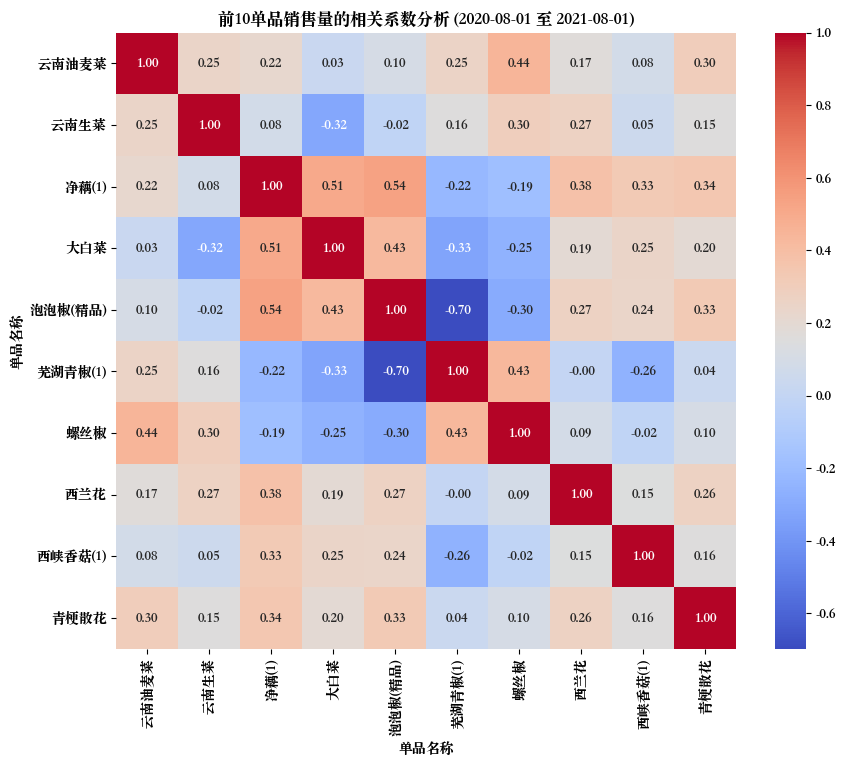

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def analyze_correlation_for_top_n_products(df, start_date, end_date, top_n=10):
    # Filter data within the specified date range
    filtered_df = df[(df['销售日期'] >= start_date) & (df['销售日期'] <= end_date)]
    
    # Group by '单品名称' to find total sales and select top N products
    product_totals = filtered_df.groupby('单品名称').size().reset_index(name='总数量')
    top_products = product_totals.nlargest(top_n, '总数量')['单品名称']
    
    # Filter the DataFrame to include only top N products
    filtered_top_df = filtered_df[filtered_df['单品名称'].isin(top_products)]
    
    # Group by '销售日期' and '单品名称' and count the occurrences, pivoting data to create a matrix
    sales_by_date_category = filtered_top_df.groupby(['销售日期', '单品名称']).size().unstack(fill_value=0)
    
    # Compute the correlation matrix
    correlation_matrix = sales_by_date_category.corr()

    # Plot the correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'前{top_n}单品销售量的相关系数分析 ({start_date} 至 {end_date})')
    plt.show()

# Example: Perform correlation analysis for the top 10 products between 2020-07-01 and 2020-08-01
analyze_correlation_for_top_n_products(merged_df, '2020-08-01', '2021-08-01', top_n=10)


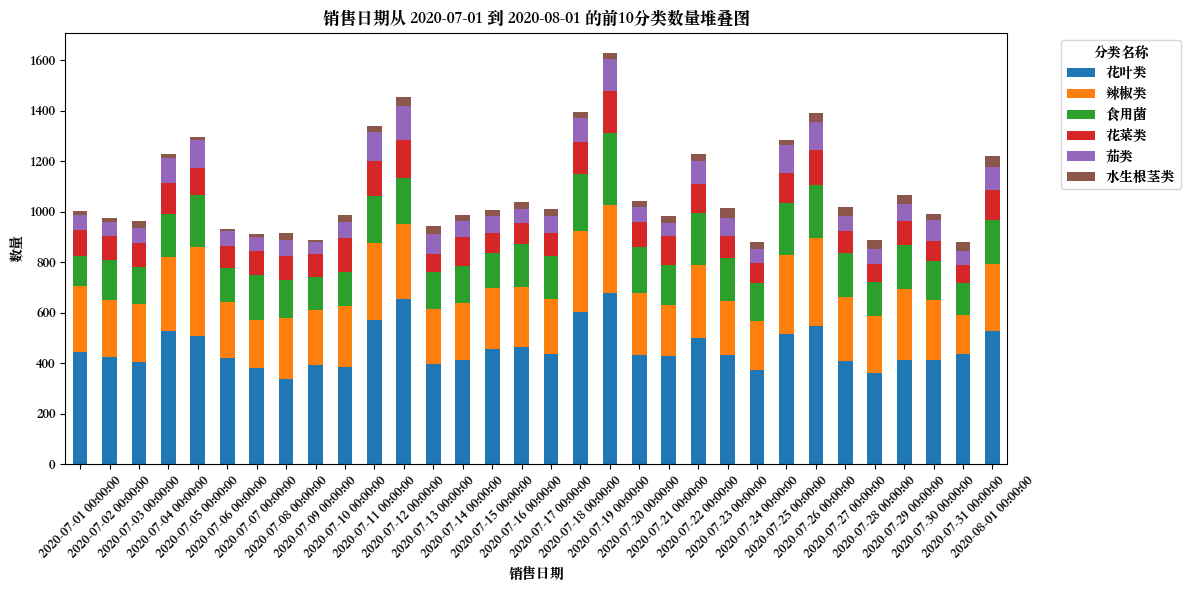

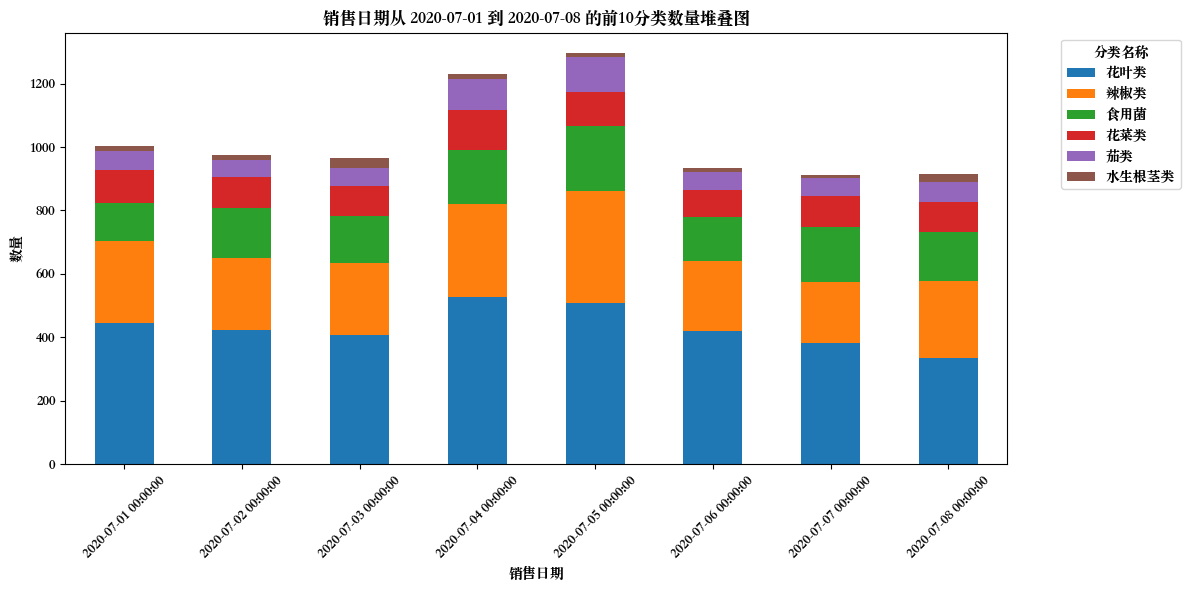

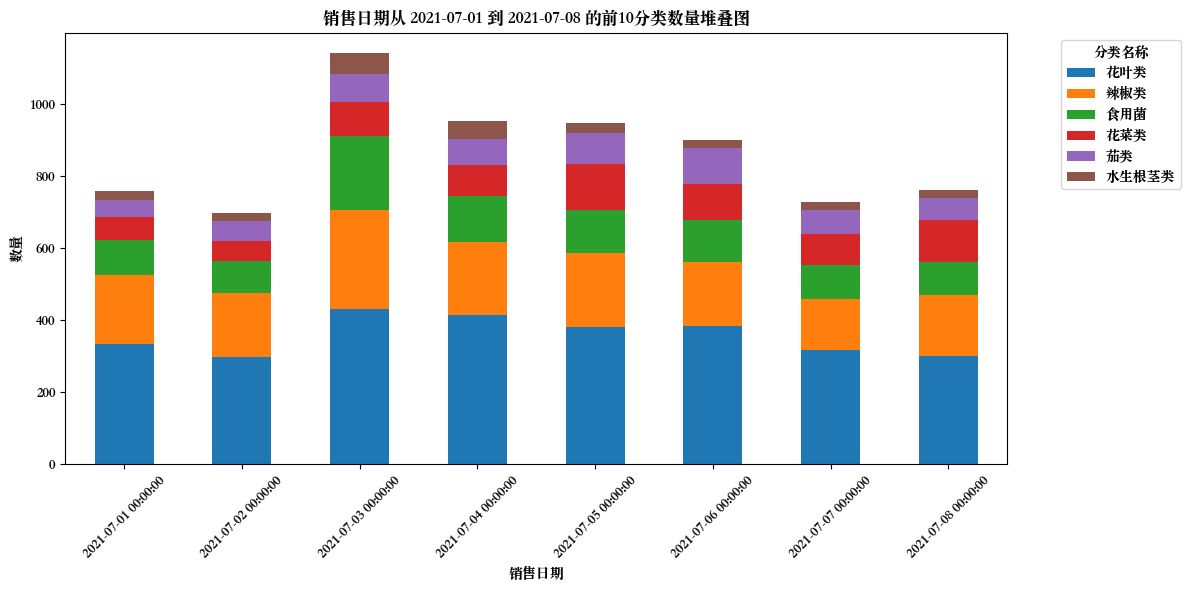

TypeError: no numeric data to plot

In [15]:
import matplotlib.pyplot as plt
import matplotlib

# 设置字体为黑体 (SimHei) 或其他你系统中支持的中文字体
plt.rcParams['font.sans-serif'] = ['Songti SC']  # 替换为你的中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# Function to generate stacked bar chart for a given date range and top N categories
def plot_stacked_bar_for_top_n_categories(df, start_date, end_date, top_n=10):
    # Filter data within the specified date range
    filtered_df = df[(df['销售日期'] >= start_date) & (df['销售日期'] <= end_date)]
    
    # Group by '分类名称' to find total sales and select top N categories
    category_totals = filtered_df.groupby('分类名称').size().reset_index(name='总数量')
    top_categories = category_totals.nlargest(top_n, '总数量')['分类名称']
    
    # Filter the DataFrame to include only top N categories
    filtered_top_df = filtered_df[filtered_df['分类名称'].isin(top_categories)]
    
    # Group by '销售日期' and '分类名称' and count the occurrences
    sales_by_date_category = filtered_top_df.groupby(['销售日期', '分类名称']).size().reset_index(name='数量')
    
    # Pivot the data for the stacked bar plot
    pivot_df = sales_by_date_category.pivot(index='销售日期', columns='分类名称', values='数量').fillna(0)
    
    # Reorder columns to sort by total quantities in descending order
    ordered_columns = top_categories.tolist()  # Ensure columns follow the order of top categories
    pivot_df = pivot_df[ordered_columns]
    
    # Plotting the stacked bar chart
    pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'销售日期从 {start_date} 到 {end_date} 的前{top_n}分类数量堆叠图')
    plt.xlabel('销售日期')
    plt.ylabel('数量')
    plt.xticks(rotation=45)
    plt.legend(title='分类名称', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Example: Generate stacked bar chart for 2020-07-01 to 2020-08-01 with top 10 categories
plot_stacked_bar_for_top_n_categories(merged_df, '2020-07-01', '2020-08-01', top_n=10)

# You can call the function with different date ranges as needed:
plot_stacked_bar_for_top_n_categories(merged_df, '2020-07-01', '2020-07-08', top_n=10)
plot_stacked_bar_for_top_n_categories(merged_df, '2021-07-01', '2021-07-08', top_n=10)
plot_stacked_bar_for_top_n_categories(merged_df, '2022-07-01', '2020-07-08', top_n=10)
# plot_stacked_bar_for_top_n_categories(merged_df, '2023-07-01', '2021-07-08', top_n=10)
# plot_stacked_bar_for_top_n_categories(merged_df, '2020-09-02', '2020-11-01', top_n=10)
# plot_stacked_bar_for_top_n_categories(merged_df, '2020-1-02', '2020-12-01', top_n=10)
# plot_stacked_bar_for_top_n_categories(merged_df, '2020-08-02', '2020-09-01', top_n=10)
# plot_stacked_bar_for_top_n_categories(merged_df, '2020-09-02', '2020-10-01', top_n=10)
# plot_stacked_bar_for_top_n_categories(merged_df, '2020-10-02', '2020-11-01', top_n=10)
# plot_stacked_bar_for_top_n_categories(merged_df, '2020-11-02', '2020-12-01', top_n=10)


<Figure size 1200x800 with 0 Axes>

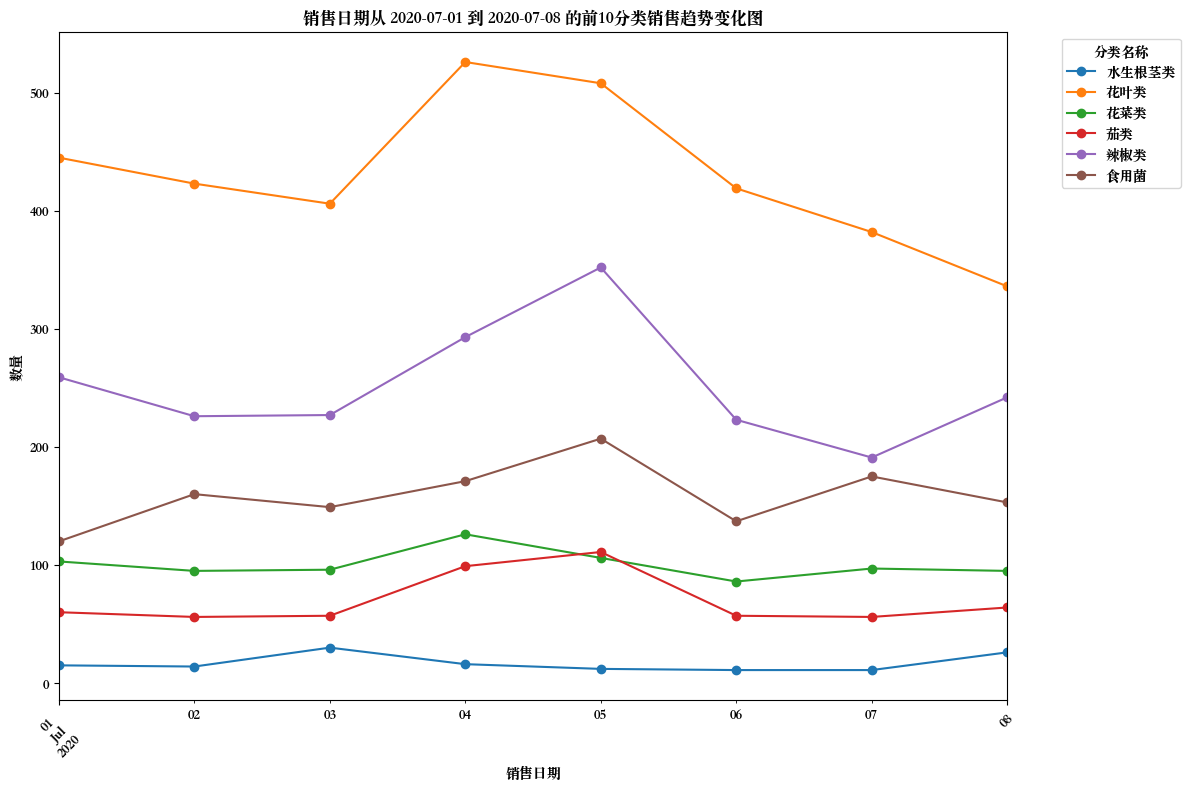

<Figure size 1200x800 with 0 Axes>

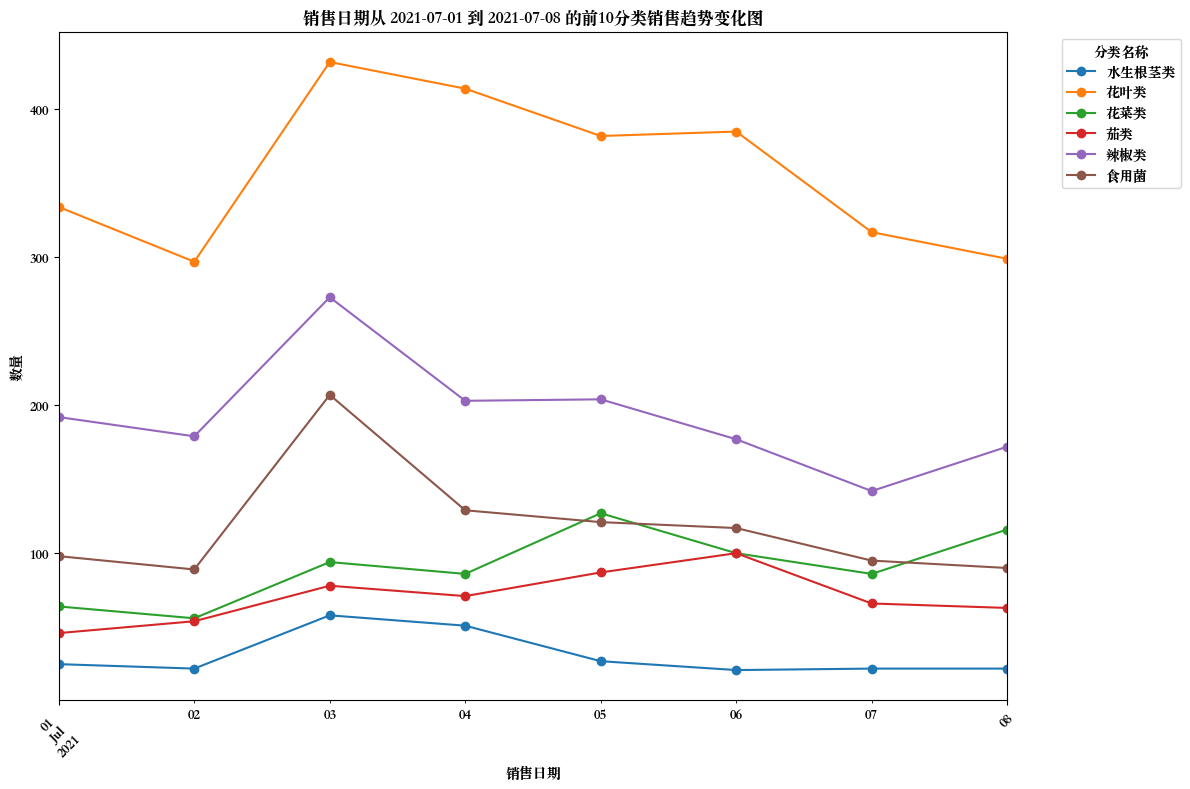

<Figure size 1200x800 with 0 Axes>

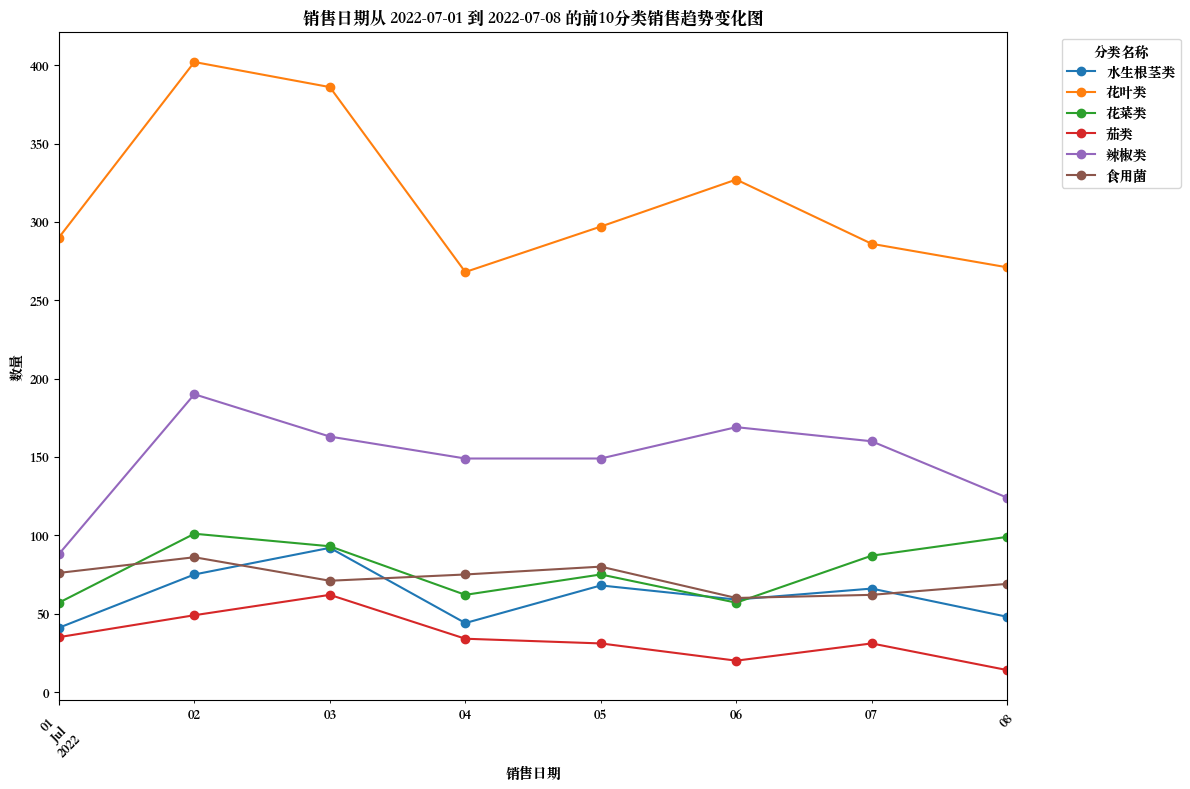

In [16]:
def plot_category_sales_trend(df, start_date, end_date, top_n=10):
    # Filter data within the specified date range
    filtered_df = df[(df['销售日期'] >= start_date) & (df['销售日期'] <= end_date)]
    
    # Group by '分类名称' to find total sales and select top N categories
    category_totals = filtered_df.groupby('分类名称').size().reset_index(name='总数量')  # Ensure this line is present
    top_categories = category_totals.nlargest(top_n, '总数量')['分类名称']
    
    # 仅保留前 N 个分类的数据
    filtered_top_df = filtered_df[filtered_df['分类名称'].isin(top_categories)]
    
    # 以 '销售日期' 和 '分类名称' 进行分组，并统计数量
    sales_trend = filtered_top_df.groupby(['销售日期', '分类名称']).size().reset_index(name='数量')
    
    # 透视数据以便于绘制趋势图
    trend_pivot = sales_trend.pivot(index='销售日期', columns='分类名称', values='数量').fillna(0)
    
    # 绘制销售趋势变化图
    plt.figure(figsize=(12, 8))
    trend_pivot.plot(kind='line', figsize=(12, 8), marker='o')
    plt.title(f'销售日期从 {start_date} 到 {end_date} 的前{top_n}分类销售趋势变化图')
    plt.xlabel('销售日期')
    plt.ylabel('数量')
    plt.xticks(rotation=45)
    plt.legend(title='分类名称', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 调用函数以指定日期范围和前 N 分类绘制销售趋势图
plot_category_sales_trend(merged_df, '2020-07-01', '2020-07-08', top_n=10)
plot_category_sales_trend(merged_df, '2021-07-01', '2021-07-08', top_n=10)
plot_category_sales_trend(merged_df, '2022-07-01', '2022-07-08', top_n=10)
